<a href="https://colab.research.google.com/github/Aadityasindhuu/Aadityasindhuu/blob/main/10th_exp_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Define number of classes
num_classes = 10

# Load pre-trained VGG16 model
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers in the pre-trained model
for layer in vgg.layers:
    layer.trainable = False

# Define your custom output layers
x = Flatten()(vgg.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)



In [8]:
# Create the final model
model = Model(inputs=vgg.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 696s 444ms/step - loss: 1.4369 - accuracy: 0.4946 - val_loss: 1.2458 - val_accuracy: 0.5628
Epoch 2/10
1563/1563 [==============================] - 683s 437ms/step - loss: 1.2674 - accuracy: 0.5528 - val_loss: 1.1946 - val_accuracy: 0.5807
Epoch 3/10
1563/1563 [==============================] - 642s 411ms/step - loss: 1.2149 - accuracy: 0.5724 - val_loss: 1.1858 - val_accuracy: 0.5821
Epoch 4/10
1563/1563 [==============================] - 680s 435ms/step - loss: 1.1788 - accuracy: 0.5875 - val_loss: 1.1469 - val_accuracy: 0.6020
Epoch 5/10
1563/1563 [==============================] - 679s 435ms/step - loss: 1.1509 - accuracy: 0.5961 - val_loss: 1.1503 - val_accuracy: 0.5940
Epoch 6/10
1563/1563 [==============================] - 677s 433ms/step - loss: 1.1278 - accuracy: 0.6050 - val_loss: 1.1236 - val_accuracy: 0.6080
Epoch 7/10
1563/1563 [==============================] - 673s 431ms/step - loss: 1.1048 - accuracy: 0.6119 - val_

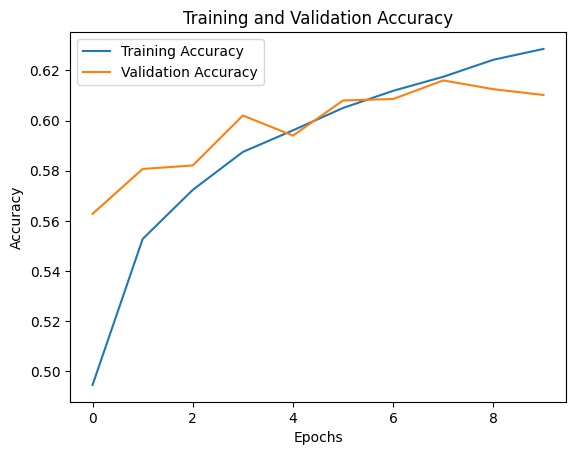

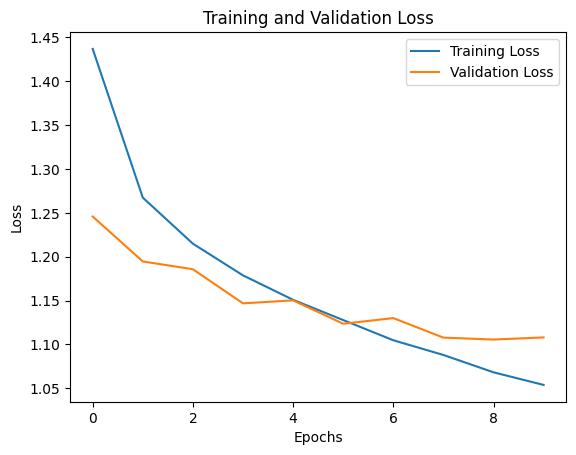

Training Accuracy: 0.6285600066184998
Validation Accuracy: 0.6101999878883362


In [9]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Print model training and validation accuracy
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])